In [1]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
#默认下载训练集（60000个数据）
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
    )
#这一步可以将图片从PIL.Image类，标签从int类，一起转换为torchtensor类
test_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=False,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
    )

0.1%

100.0%

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz


0.4%0%

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz


159.1%

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [3]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=20)

# dataset类查看（自带MNIST数据集）

In [4]:
print('trainset length: ',len(train_set))
print('testset length: ',len(test_set))

trainset length:  60000
testset length:  10000


输出数据集长度

In [5]:
type(train_set)

torchvision.datasets.mnist.FashionMNIST

In [6]:
print('imagepart shape: ',train_set.data.shape)
print('labelpart shape: ',train_set.targets.shape)


imagepart shape:  torch.Size([60000, 28, 28])
labelpart shape:  torch.Size([60000])


输出数据集图片和标签各部分

<class 'tuple'>
<class 'int'>
<class 'torch.Tensor'>
torch.Size([1, 28, 28])
Sample length: 2


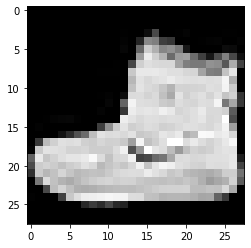

In [7]:
iterator=iter(train_set)
sample_1=next(iterator)
image_1, label_1 = sample_1


print(type(sample_1))
print(type(label_1))
print(type(image_1))
print(image_1.shape)
print('Sample length:',len(sample_1))
plt.imshow(image_1.squeeze(),cmap='gray')

In [8]:
print(image_1.squeeze())

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
         0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000

数据集中，每个数据单位以Tuple的形式存在，其中包含一个torch.tensor类型的图片和int型的标签,灰度图片被默认附加了颜色通道维度。使用迭代器，输出第一个数据单位，解包之后可以分别处理图片和标签。

torch.Size([1, 28, 28])
<class 'int'>


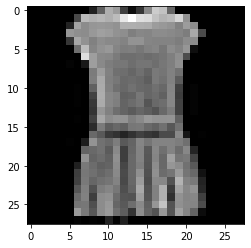

In [185]:
sample_2=next(iterator)
image_2, label_2 = sample_2
print(image_2.shape)
print(type(label_2))
plt.imshow(image_2.squeeze(),cmap='gray')

# dataloader类查看

In [160]:
print('trainloader length: ',len(train_loader))

trainloader length:  3000


长度为batch的数目（数据集／batch size）

In [161]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

<class 'list'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([20, 1, 28, 28])
torch.Size([20])
Batch length: 2


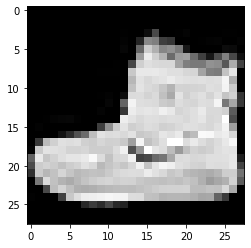

In [192]:
iterator=iter(train_loader)
batch_1=next(iterator)
images_1, labels_1 = batch_1
print(type(batch_1))
print(type(labels_1))
print(type(images_1))
print(images_1.shape)
print(labels_1.shape)
print('Batch length:',len(batch_1))
batch_1_image_1=images_1[0,:,:,:]
plt.imshow(batch_1_image_1.squeeze(),cmap='gray')

加载器中，每个数据单位以list的形式存在，其中包含个torch.tensor类型的图片集合和torch.tensor型的标签集合。使用迭代器，输出第一个数据单位，解包之后可以分别处理图片集合和标签集合。

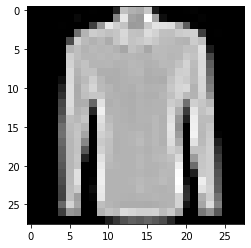

In [194]:
batch_2=next(iterator)
images_2, labels_2 = batch_2
batch_2_image_1=images_2[0,:,:,:]
plt.imshow(batch_2_image_1.squeeze(),cmap='gray')

再次迭代，可以处理下一个数据单位。